Import libraries
---------------

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import numpy as np
import csv
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Draw simple map of Asia

Let's start simple. We will use the Basemap module to plot a map of the region of our interest.

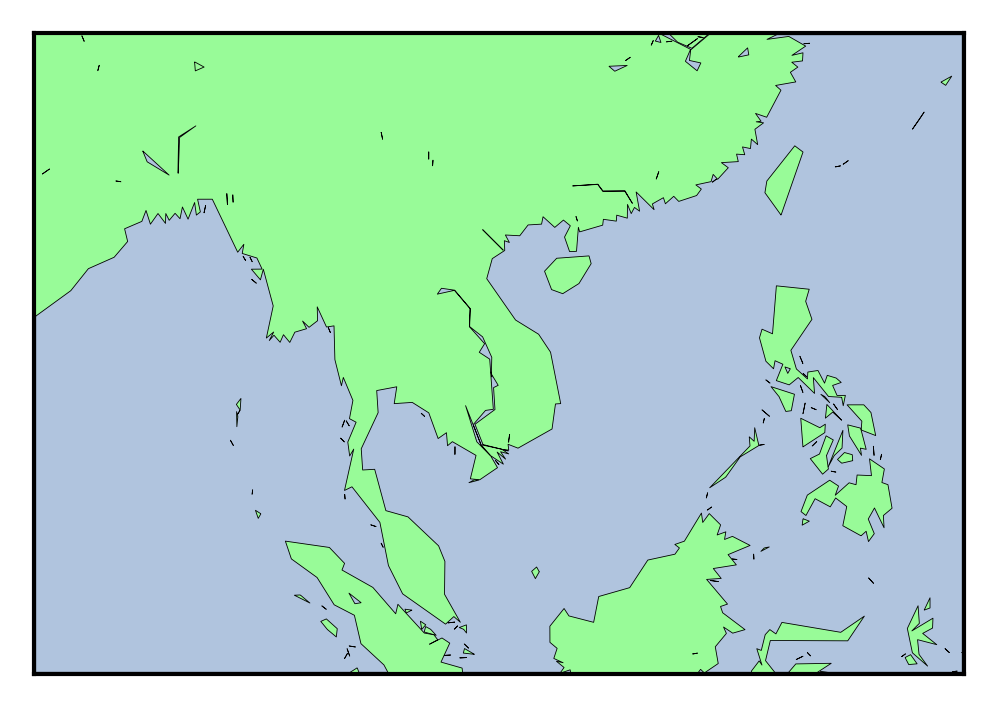

In [8]:
# create a figure canvas. Dimensions are in inches.
fig = plt.figure(figsize=(4, 3), dpi= 300, edgecolor='white')
ax = fig.add_subplot(111, facecolor='white', frame_on=False)

# create map
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3395, # WGS84 world map projection, see http://epsg.io/3395
            area_thresh=0., # to include small islands
            llcrnrlon=82.2, llcrnrlat=-1.3, urcrnrlon=130.3, urcrnrlat=30.5)
            # get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
m.drawmapboundary(fill_color='lightsteelblue') # sea
m.fillcontinents(color='palegreen',lake_color='lightsteelblue') # land & lakes
m.drawcoastlines(linewidth=0.2, color='black', zorder=25)
#m.drawcountries(color='black')
#m.drawparallels(np.arange(-90.,91.,10.), labels=[False,True,True,False], color='grey')
#m.drawmeridians(np.arange(-180.,181.,10.), labels=[True,False,False,True], color='grey')

plt.show()

# Plot a map with locality data

Now that we have the layout of our map the way we like it, let's plot some collection data. You can use your own data for this if you want, or use the "example_localities.csv" file in the folder for the layout. Basically it has to be a comma-delimited csv file with at least the columns titles "Latitude" and "Longitude" (mind the case-sensitivity).

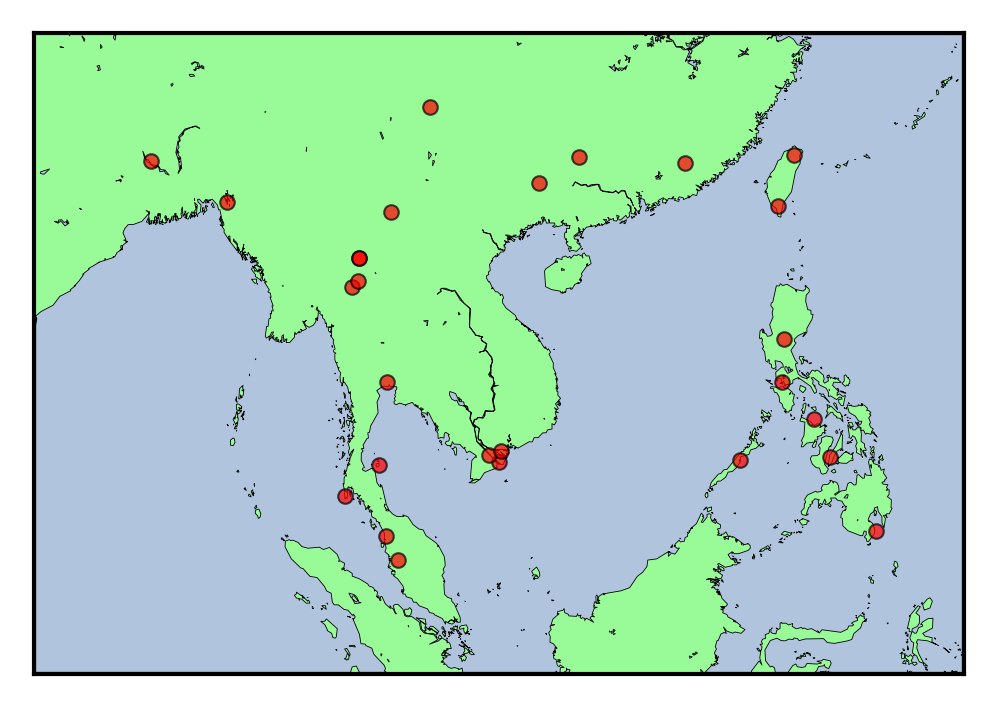

In [9]:
# create a figure canvas. Dimensions are in inches.
fig = plt.figure(figsize=(4, 3), dpi= 300, edgecolor='white')
ax = fig.add_subplot(111, facecolor='white', frame_on=False)

# create map
m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3395, # WGS84 world map projection, see http://epsg.io/3395
            area_thresh=0., # to include small islands
            llcrnrlon=82.2, llcrnrlat=-1.3, urcrnrlon=130.3, urcrnrlat=30.5)
            # get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
m.drawmapboundary(fill_color='lightsteelblue') # sea
m.fillcontinents(color='palegreen',lake_color='lightsteelblue') # land & lakes
m.drawcoastlines(linewidth=0.2, color='black', zorder=25)
#m.drawcountries(color='black')
#m.drawparallels(np.arange(-90.,91.,10.), labels=[False,True,True,False], color='grey')
#m.drawmeridians(np.arange(-180.,181.,10.), labels=[True,False,False,True], color='grey')


# Plot points on map
# pick a marker: https://matplotlib.org/api/markers_api.html
datapoints1 = pd.read_csv("example_localities.csv", header=0)
col_y = list(datapoints1.Latitude)
col_x = list(datapoints1.Longitude)

m.plot(col_x, col_y, marker='.',color='red', markersize=7, zorder=25, latlon=True,
       linestyle='None', markeredgewidth=.5, markeredgecolor='black', alpha=0.7)

plt.show()

# Now plot a map with locality data with a fancy layover and export to different formats

Our map is looking pretty good, but it can be fancier. Let's use the ARCGis API service for some cool options. Also, this time we are going to save our map as a PDF, PNG and TIFF.

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=9150462.14321,-143759.058832,14504929.6504,3546300.27951&bboxSR=3395&imageSR=3395&size=500,344&dpi=96&format=png32&f=image


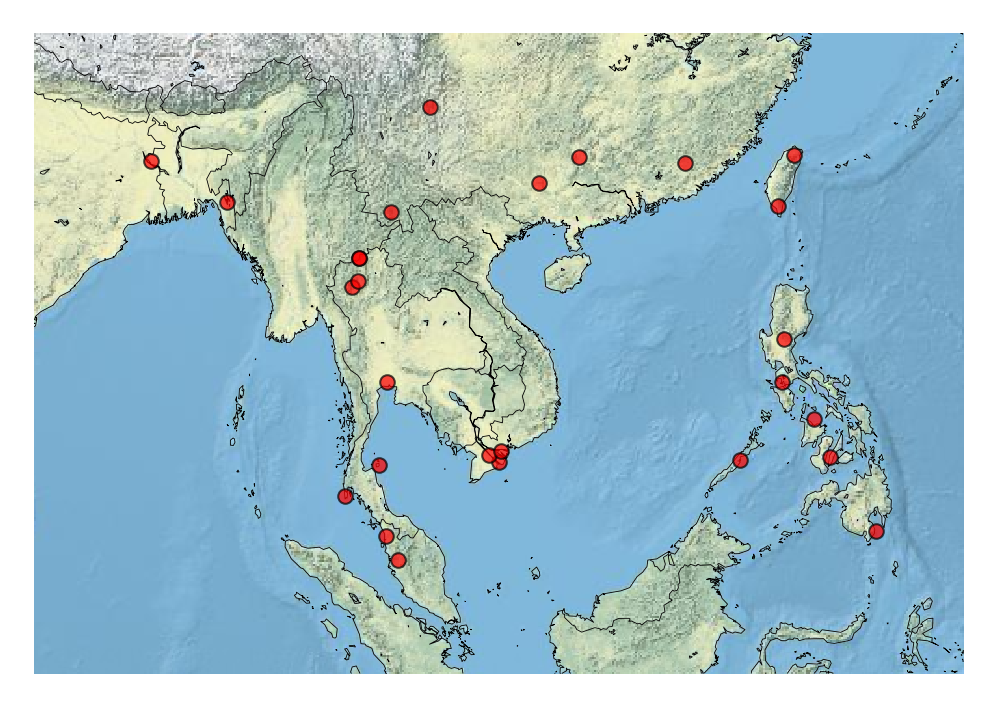

In [10]:
# create a figure canvas. Dimensions are in inches.
fig = plt.figure(figsize=(4, 3), dpi= 300, edgecolor='white')
ax = fig.add_subplot(111, facecolor='white', frame_on=False)

# create map
m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3395, # WGS84 world map projection, see http://epsg.io/3395
            area_thresh=0., # to include small islands
            llcrnrlon=82.2, llcrnrlat=-1.3, urcrnrlon=130.3, urcrnrlat=30.5)
            # get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
#m.drawmapboundary(fill_color='lightsteelblue') # sea
#m.fillcontinents(color='palegreen',lake_color='lightsteelblue') # land & lakes
m.drawcoastlines(linewidth=0.2, color='black', zorder=26)
m.drawcountries(linewidth=0.2, color='black', zorder=26)
#m.drawparallels(np.arange(-90.,91.,10.), labels=[False,True,True,False], color='grey')
#m.drawmeridians(np.arange(-180.,181.,10.), labels=[True,False,False,True], color='grey')
m.arcgisimage(service='World_Physical_Map', xpixels=500, verbose=True)
# http://server.arcgisonline.com/arcgis/rest/services
# options see: http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html

# Plot points on map
# pick a marker: https://matplotlib.org/api/markers_api.html
datapoints1 = pd.read_csv("example_localities.csv", header=0)
col_y = list(datapoints1.Latitude)
col_x = list(datapoints1.Longitude)

m.plot(col_x, col_y, marker='.',color='red', markersize=7, zorder=27, latlon=True,
       linestyle='None', markeredgewidth=.5, markeredgecolor='black', alpha=0.7)

#plt.show()

plt.savefig('My_first_map.png', dpi=300, bbox_inches="tight")
plt.savefig('My_first_map.tiff', dpi=300, bbox_inches="tight")
plt.savefig('My_first_map.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Different markers for different species

Using Pandas dataframes, we can sort the data from a spreadsheet by species and mark them differently on the map.

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=9150462.14321,-143759.058832,14504929.6504,3546300.27951&bboxSR=3395&imageSR=3395&size=500,344&dpi=96&format=png32&f=image


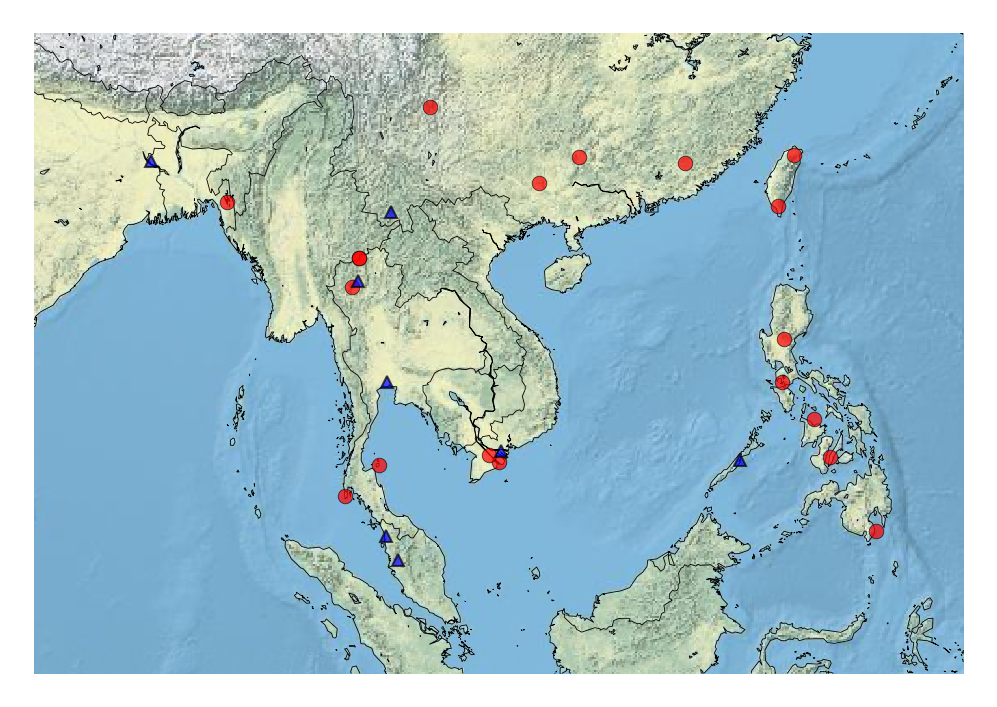

In [11]:
# create a figure canvas. Dimensions are in inches.
fig = plt.figure(figsize=(4, 3), dpi= 300, edgecolor='white')
ax = fig.add_subplot(111, facecolor='white', frame_on=False)

# create map
m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3395, # WGS84 world map projection, see http://epsg.io/3395
            area_thresh=0., # to include small islands
            llcrnrlon=82.2, llcrnrlat=-1.3, urcrnrlon=130.3, urcrnrlat=30.5)
            # get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
#m.drawmapboundary(fill_color='lightsteelblue') # sea
#m.fillcontinents(color='palegreen',lake_color='lightsteelblue') # land & lakes
m.drawcoastlines(linewidth=0.2, color='black', zorder=26)
m.drawcountries(linewidth=0.2, color='black', zorder=26)
#m.drawparallels(np.arange(-90.,91.,10.), labels=[False,True,True,False], color='grey')
#m.drawmeridians(np.arange(-180.,181.,10.), labels=[True,False,False,True], color='grey')
m.arcgisimage(service='World_Physical_Map', xpixels=500, verbose=True)
# http://server.arcgisonline.com/arcgis/rest/services
# options see: http://qingkaikong.blogspot.com/2016/06/nice-python-basemap-background.html

# Read the data from csv spreadsheet and sort by species
localitydata = pd.read_csv("example_localities.csv", header=0)
localitydata_byspecies = localitydata.groupby('Species', sort=0)

# plot survey points for Bactrocera dorsalis
Species = 'Bactrocera dorsalis'
col_y_Bdorsalis = list(localitydata_byspecies.get_group(Species)['Latitude'])
col_x_Bdorsalis = list(localitydata_byspecies.get_group(Species)['Longitude'])
m.plot(col_x_Bdorsalis, col_y_Bdorsalis, marker='.',color='red', markersize=7, zorder=27, latlon=True,
       linestyle='None', markeredgewidth=.2, markeredgecolor='black', alpha=0.7)

# plot survey points for Bactrocera carambolae
Species = 'Bactrocera carambolae'
col_y_Bcarambolae = list(localitydata_byspecies.get_group(Species)['Latitude'])
col_x_Bcarambolae = list(localitydata_byspecies.get_group(Species)['Longitude'])
m.plot(col_x_Bcarambolae, col_y_Bcarambolae, marker='^',color='blue', markersize=3, zorder=27, latlon=True,
       linestyle='None', markeredgewidth=.5, markeredgecolor='black', alpha=0.7)


plt.show()

# Scale marker size relative to abundance
We can have the size of the marker reflect the abundance. To do this, instead of using the m.plot function, we will use m.scatter. For more info and all the options for scatterplots, see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

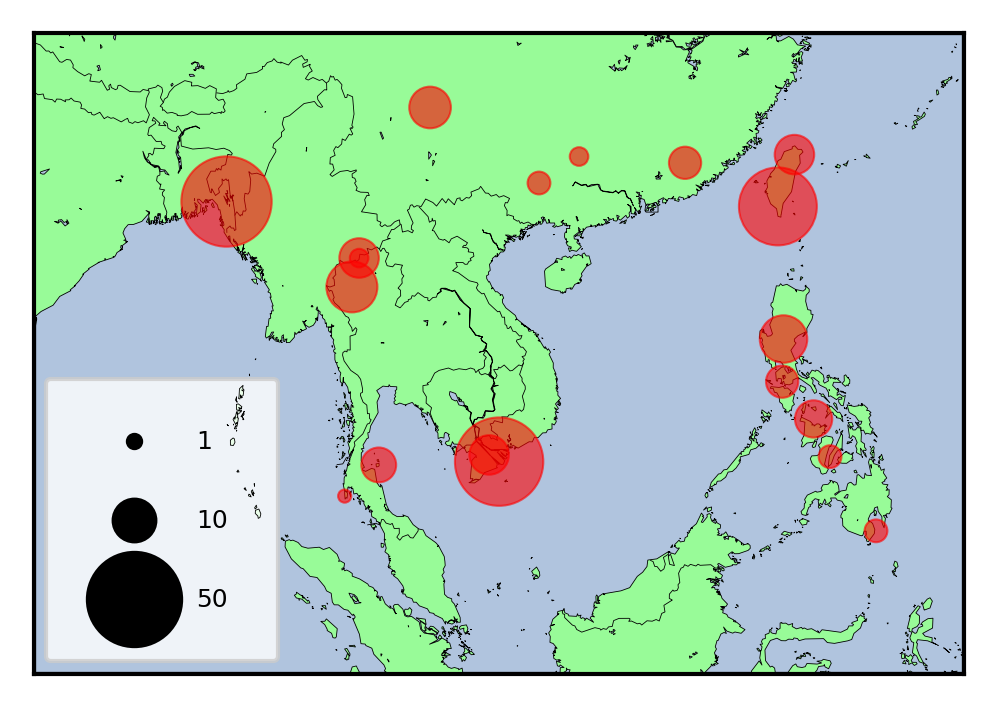

In [12]:
# create a figure canvas. Dimensions are in inches.
fig = plt.figure(figsize=(4, 3), dpi= 300, edgecolor='white')
ax = fig.add_subplot(111, facecolor='white', frame_on=False)

# create map
m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3395, # WGS84 world map projection, see http://epsg.io/3395
            area_thresh=0., # to include small islands
            llcrnrlon=82.2, llcrnrlat=-1.3, urcrnrlon=130.3, urcrnrlat=30.5)
            # get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
m.drawmapboundary(fill_color='lightsteelblue') # sea
m.fillcontinents(color='palegreen',lake_color='lightsteelblue') # land & lakes
m.drawcoastlines(linewidth=0.2, color='black', zorder=25)
m.drawcountries(linewidth=0.2, color='black', zorder=25)

# Read the data from csv spreadsheet and sort by species
localitydata = pd.read_csv("example_localities.csv", header=0)
localitydata_byspecies = localitydata.groupby('Species', sort=0)

# plot survey points for Bactrocera dorsalis with size relative to abundance
Species = 'Bactrocera dorsalis'
col_y_Bdorsalis = list(localitydata_byspecies.get_group(Species)['Latitude'])
col_x_Bdorsalis = list(localitydata_byspecies.get_group(Species)['Longitude'])
size = list(localitydata_byspecies.get_group(Species)['Abundance'])
scalar = 10 # factor to increase size of markers
biggersize = [n * scalar for n in size]
m.scatter(col_x_Bdorsalis, col_y_Bdorsalis, s=biggersize, marker='o',
          color='red', alpha=.6, linestyle='None', linewidths=0.5,
          edgecolors='red', latlon=True, zorder=25)

# add legend
l1 = plt.scatter([],[], s=1*scalar, edgecolors='none')
l2 = plt.scatter([],[], s=10*scalar, edgecolors='none')
l3 = plt.scatter([],[], s=50*scalar, edgecolors='none')
labels = ["1", "10", "50"]
leg = plt.legend([l1, l2, l3], labels, frameon=True, fontsize=6,
                 handlelength=3, loc=3, borderpad=2.,
                 handletextpad=1, scatterpoints=1, labelspacing=2.2)
for marker in leg.legendHandles:
    marker.set_color('black')

plt.show()

# Advanced topic: color countries

Using ShapeFile data from http://naturalearthdata.com we can color countries or other political areas. We will be using the 'subunit' list, which differentiates between major regions within a country, such as Hawaii and Alaska being separate shapes from mainland U.S.A. The necessary shapefiles are already in the github folder.

## Import libraries
We will have to import (and install) additional libraries:

In [15]:
import geopandas as gp
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

## Let's see what the subunits from naturalearthdata are
This list is also available as an excel file in the github folder, called 'subunitlist.xlsx'. We additionally here save all the subunits to a python list (called naturalearthlist) that we can use further on to check if all the countries we want to color are recognized.

In [16]:
# shapefile from Natural Earth https://www.naturalearthdata.com
shapefile = "ne_10m_admin_0_map_subunits"

shapes = gp.GeoDataFrame.from_file(shapefile)
#print(shapes)

naturalearthlist = []
for mapunit in range(len(shapes.SUBUNIT)):
    print(shapes.SUBUNIT[mapunit] + " | " + 
          shapes.ADMIN[mapunit] + " | " + 
          shapes.ADM0_A3[mapunit] + " | " + 
          shapes.TYPE[mapunit])
    naturalearthlist.append(shapes.SUBUNIT[mapunit])

Indonesia | Indonesia | IDN | Sovereign country
Malaysia | Malaysia | MYS | Sovereign country
Chile | Chile | CHL | Geo subunit
Bolivia | Bolivia | BOL | Sovereign country
Peru | Peru | PER | Sovereign country
Argentina | Argentina | ARG | Sovereign country
Dhekelia Sovereign Base Area | Dhekelia Sovereign Base Area | ESB | Dependency
Cyprus | Cyprus | CYP | Sovereign country
India | India | IND | Geo subunit
China | China | CHN | Geo subunit
Israel | Israel | ISR | Country
Gaza | Palestine | PSX | Geo unit
West Bank | Palestine | PSX | Geo unit
Lebanon | Lebanon | LBN | Sovereign country
Ethiopia | Ethiopia | ETH | Sovereign country
South Sudan | South Sudan | SDS | Sovereign country
Puntland | Somalia | SOM | Geo unit
Somalia | Somalia | SOM | Geo unit
Kenya | Kenya | KEN | Sovereign country
Pakistan | Pakistan | PAK | Sovereign country
Malawi | Malawi | MWI | Sovereign country
Tanzania | United Republic of Tanzania | TZA | Sovereign country
UNDOF | Syria | SYR | Overlay
Somaliland |

## Make a list of the countries we want to color

In [23]:
# color countries that fall within the distribution
distribution = ('Sri Lanka', 'Bangladesh', 'Nepal', 'Bhutan', 'Myanmar',
                'Thailand', 'Vietnam', 'Malaysia', 'Neverland')

# check if all countries can be found
for country in distribution:
    if country not in naturalearthlist:
        print("Cannot find: " + country)

Cannot find: Neverland


## And let's plot the map

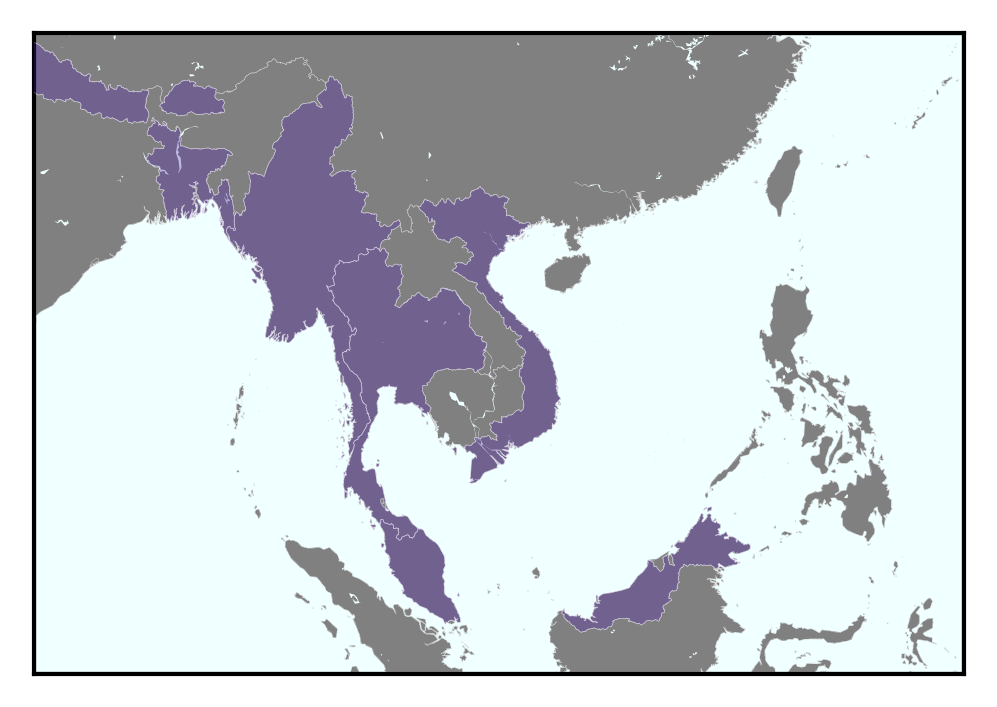

In [25]:
# create a figure canvas. Dimensions are in inches.
fig = plt.figure(figsize=(4, 3), dpi= 300, edgecolor='white')
ax = fig.add_subplot(111, facecolor='white', frame_on=False)

# create map
m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='tmerc',
            epsg=3395, # WGS84 world map projection, see http://epsg.io/3395
            area_thresh=0., # to include small islands
            llcrnrlon=82.2, llcrnrlat=-1.3, urcrnrlon=130.3, urcrnrlat=30.5)
            # get bounding box coords here: http://boundingbox.klokantech.com
            # select 'dublincore'
m.drawmapboundary(fill_color='azure') # sea
m.fillcontinents(color='grey',lake_color='azure') # land & lakes
m.readshapefile(shapefile, 'units', color='lightgrey', linewidth=.1)

Distributionpatch = []
for info, shape in zip(m.units_info, m.units):
    if info['SUBUNIT'] in distribution:
        Distributionpatch.append( Polygon(np.array(shape), True) )

ax.add_collection(PatchCollection(Distributionpatch,
                                  facecolor='#4c1ab0',
                                  edgecolor='white',
                                  linewidths=.2,
                                  alpha=0.3,
                                  zorder=26))

plt.show()